<a href="https://colab.research.google.com/github/itcxx/Notebook/blob/main/softmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### softmax回归实现
参考[沐神课程](https://zh-v2.d2l.ai/chapter_linear-networks/softmax-regression.html)

> **softmax用于分类任务中的每种类型的概率情况**

分类标签采用 $ one-hot encoding$的方式。独热编码是一个向量，它的分量和类别一样多。类别对应的分量设置为1，其他所有分量设置为0。

举例：如果有三种类型，'cat'=(1,0,0),'dog'=(0,1,0),'chicken'=(0,0,1):

$$
y 𝛜 {(1,0,0),(0,1,0),(0,0,1)}.
$$

> **softmax函数**

社会科学家邓肯·卢斯于1959年在选择模型（choice model）的理论基础上 发明的softmax函数。

* softmax函数能够将未规范化的预测变换为非负数并且`总和为1`，同时`让模型保持可导`的性质。
* 在多分类问题中，Softmax 输出的最大值对应的类别通常被认为是模型的预测结果。

$$
argmax(\hat{y_i})=argmaxO(x)_i
$$
  向量表示为：
$$
O = XW + b
$$
$$
\hat{Y}= softmax(O)
$$
* 给定一个向量 $( X = [x_1, x_2, ..., x_K] )$，其中 $ K $ 是类别的数量，`Softmax` 函数的定义为：

$$
O(x)_i = \frac{e^{x_i}}{\sum_{j=1}^K e^{x_j}}
$$

对于 $( i = 1, 2, ..., K )$。

- 分母中的 $(\sum_{j=1}^K e^{x_j} )$ 是对所有 $ K $ 类别的自然指数求和，这确保了 Softmax 输出的值总和为 1。

- 为了提高数值稳定性，通常会在应用 Softmax 前将输入值减去它们的最大值：

$$
o_i' = o_i - \max(o)
$$

  这种调整不会改变 Softmax 的输出，但它可以提高数值稳定性。

  这个 Softmax 函数经常在深度学习和机器学习的分类问题中被使用，尤其是在多分类问题的输出层。
  $$
O(x)_i = \frac{e^{x_i - \max(o)}}{\sum_{j=1}^K e^{x_j - \max(o)}}
$$






### 对数似然

softmax函数给出了一个向量$\hat{\mathbf{y}}$，
我们可以将其视为“对给定任意输入$\mathbf{x}$的每个类的条件概率”。每个$\mathbf{x}$向量包含多个特征。
例如，$\hat{y}_1$=$P(y=\text{猫} \mid \mathbf{x})$。
假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本，
其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成。
我们可以将估计值与实际值进行比较：

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何标签$\mathbf{y}$和模型预测$\hat{\mathbf{y}}$，损失函数为：

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$
:eqlabel:`eq_l_cross_entropy`

在本节稍后的内容会讲到， :eqref:`eq_l_cross_entropy`中的损失函数
通常被称为*交叉熵损失*（cross-entropy loss）。
由于$\mathbf{y}$是一个长度为$q$的独热编码向量，
所以除了一个项以外的所有项$j$都消失了。
由于所有$\hat{y}_j$都是预测的概率，所以它们的对数永远不会大于$0$。
因此，如果正确地预测实际标签，即如果实际标签$P(\mathbf{y} \mid \mathbf{x})=1$，
则损失函数不能进一步最小化。
注意，这往往是不可能的。
例如，数据集中可能存在标签噪声（比如某些样本可能被误标），
或输入特征没有足够的信息来完美地对每一个样本分类。

### softmax及其导数
:label:`subsec_softmax_and_derivatives`

由于softmax和相关的损失函数很常见，
因此我们需要更好地理解它的计算方式。
将 :eqref:`eq_softmax_y_and_o`代入损失 :eqref:`eq_l_cross_entropy`中。
利用softmax的定义，我们得到：

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

考虑相对于任何未规范化的预测$o_j$的导数，我们得到：

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

换句话说，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。
从这个意义上讲，这与我们在回归中看到的非常相似，
其中梯度是观测值$y$和估计值$\hat{y}$之间的差异。
这不是巧合，在任何指数族分布模型中
（参见[本书附录中关于数学分布的一节](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/distributions.html)），
对数似然的梯度正是由此得出的。
这使梯度计算在实践中变得容易很多。

### 交叉熵损失

现在让我们考虑整个结果分布的情况，即观察到的不仅仅是一个结果。
对于标签$\mathbf{y}$，我们可以使用与以前相同的表示形式。
唯一的区别是，我们现在用一个概率向量表示，如$(0.1, 0.2, 0.7)$，
而不是仅包含二元项的向量$(0, 0, 1)$。
我们使用 :eqref:`eq_l_cross_entropy`来定义损失$l$，
它是所有标签分布的预期损失值。
此损失称为*交叉熵损失*（cross-entropy loss），它是分类问题最常用的损失之一。
本节我们将通过介绍信息论基础来理解交叉熵损失。
如果想了解更多信息论的细节，请进一步参考
[本书附录中关于信息论的一节](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/information-theory.html)。

## 信息论基础
:label:`subsec_info_theory_basics`

*信息论*（information theory）涉及编码、解码、发送以及尽可能简洁地处理信息或数据。

### 熵

信息论的核心思想是量化数据中的信息内容。
在信息论中，该数值被称为分布$P$的*熵*（entropy）。可以通过以下方程得到：

$$H[P] = \sum_j - P(j) \log P(j).$$
:eqlabel:`eq_softmax_reg_entropy`

信息论的基本定理之一指出，为了对从分布$p$中随机抽取的数据进行编码，
我们至少需要$H[P]$“纳特（nat）”对其进行编码。
“纳特”相当于*比特*（bit），但是对数底为$e$而不是2。因此，一个纳特是$\frac{1}{\log(2)} \approx 1.44$比特。

### 信息量

压缩与预测有什么关系呢？
想象一下，我们有一个要压缩的数据流。
如果我们很容易预测下一个数据，那么这个数据就很容易压缩。
为什么呢？
举一个极端的例子，假如数据流中的每个数据完全相同，这会是一个非常无聊的数据流。
由于它们总是相同的，我们总是知道下一个数据是什么。
所以，为了传递数据流的内容，我们不必传输任何信息。也就是说，“下一个数据是xx”这个事件毫无信息量。

但是，如果我们不能完全预测每一个事件，那么我们有时可能会感到"惊异"。
克劳德·香农决定用信息量$\log \frac{1}{P(j)} = -\log P(j)$来量化这种惊异程度。
在观察一个事件$j$时，并赋予它（主观）概率$P(j)$。
当我们赋予一个事件较低的概率时，我们的惊异会更大，该事件的信息量也就更大。
在 :eqref:`eq_softmax_reg_entropy`中定义的熵，
是当分配的概率真正匹配数据生成过程时的*信息量的期望*。

### 重新审视交叉熵

如果把熵$H(P)$想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？
交叉熵*从*$P$*到*$Q$，记为$H(P, Q)$。
我们可以把交叉熵想象为“主观概率为$Q$的观察者在看到根据概率$P$生成的数据时的预期惊异”。
当$P=Q$时，交叉熵达到最低。
在这种情况下，从$P$到$Q$的交叉熵是$H(P, P)= H(P)$。

简而言之，我们可以从两方面来考虑交叉熵分类目标：
（i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。

### softmax 回归从零开始实现

使用Fashion-MNIST数据集


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# 加载训练集
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
# trainloader = data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# 加载测试集
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
# testloader = data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)


100%|██████████| 26421880/26421880 [00:02<00:00, 11723727.73it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200675.78it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3698648.82it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3234313.51it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



> **显示数据集样式**

Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。

In [3]:
print(len(trainset))
print(len(testset))

60000
10000


* 图片保存格式，为灰度图片，28x28
* Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [4]:
print(trainset[0][0].shape)

torch.Size([1, 28, 28])


In [5]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

显示图片样式

In [6]:
import matplotlib.pyplot as plt

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        # 隐藏X轴
        ax.axes.get_xaxis().set_visible(False)
        # 隐藏y轴
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

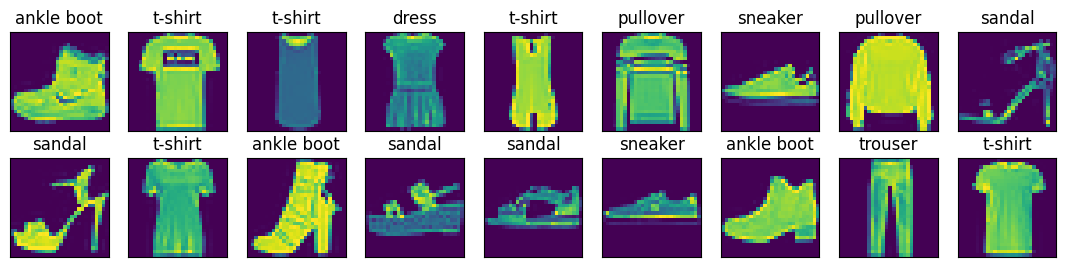

In [7]:
X, y = next(iter(data.DataLoader(trainset, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

> 批量读取操作

In [8]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(trainset, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


测试读取训练数据需要的时间

In [9]:
import time
start_time=time.time()
for X, y in train_iter:
  continue
f'{time.time()-start_time} sec'

'14.338489532470703 sec'

> 预处理训练集和测试集

In [14]:
def load_data_fashion_mnist(batch_size, resize=None):
  """下载Fashion-MNIST数据集，然后将其加载到内存中"""
  trans = [transforms.ToTensor()]

  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root="../data",train=True,transform=trans,download=True
  )
  mnist_test = torchvision.datasets.FashionMNIST(
      root="../data",train=False,transform=trans, download=True
  )
  return (data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True,num_workers=2),
          data.DataLoader(mnist_test,batch_size=batch_size,shuffle=True,num_workers=2))



下面，我们通过指定resize参数来测试load_data_fashion_mnist函数的图像大小调整功能。

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


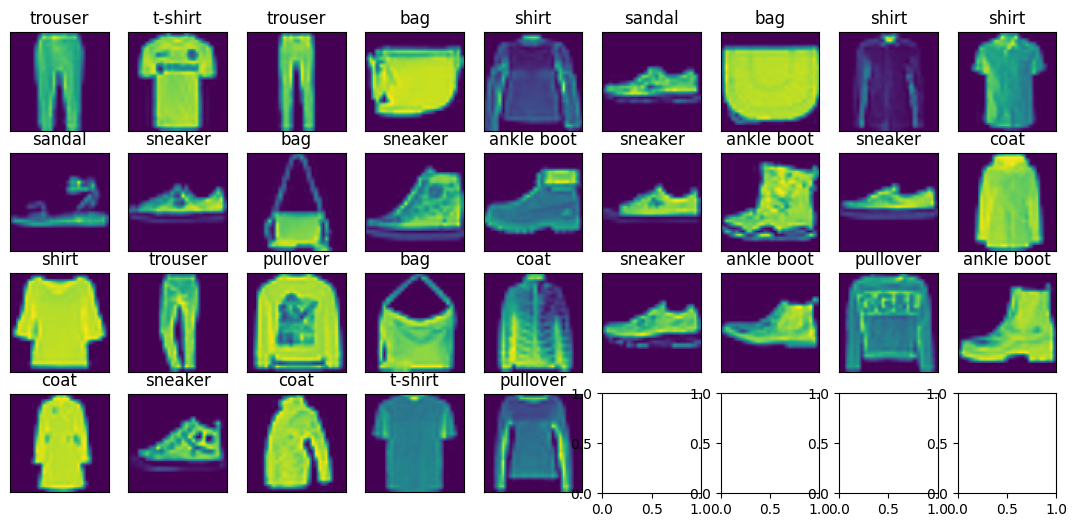

In [16]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    show_images(X.reshape(X.shape[0], X.shape[2], X.shape[3]), -(-X.shape[0]//9), 9, titles=get_fashion_mnist_labels(y))

    break

# 主代码实现

> 初始化模型参数

* 原始样本图片是 28 x 28
* 类别是10个
在softmax回归中，我们的输出与类别一样多。 因为我们的数据集有10个类别，所以网络输出维度为10。 因此，权重将构成一个$784*10$
的矩阵， 偏置将构成一个$1*10$
的行向量。 与线性回归一样，我们将使用正态分布初始化我们的权重W，偏置初始化为0。

In [17]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

> 定义softmax函数

In [18]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True) #在axis=1上进行求和，并且维持轴数不变
    return X_exp / partition  # 这里应用了广播机制

测试一下softmax

In [19]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
X_prob , X_prob.sum(axis=1)

(tensor([[0.3014, 0.1736, 0.2410, 0.2171, 0.0669],
         [0.1400, 0.0873, 0.0777, 0.4177, 0.2773]]),
 tensor([1., 1.]))

> 定义模型

定义softmax操作后，我们可以实现softmax回归模型。 下面的代码定义了输入如何通过网络映射到输出。 注意，将数据传递到模型之前，我们使用reshape函数将每张原始图像展平为向量

In [20]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W) + b)  # W= [784,10]

> 定义损失函数

* tensor的高级索引技巧[link](https://www.notion.so/itcxx/PyTorch-a2e3558785814da6861ea8a268c3ce1d)



In [23]:
# tensor高级索引案例
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],
                      [0.3,0.2,0.5]]) #表示两个样本的各自三种类型概率
y_hat[[0,1],y]  #输出第一行第一个数，第二行第三个数 (前一个list表示行号，后一个list表示行的列号)


tensor([0.1000, 0.5000])

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

由于$y$是个one-hot编码，其实loss的公式其实只是计算了正确标签的交叉熵，其它项都等于0.

In [24]:
# 定义损失函数
def cross_entropy(y_hat,y):
  return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)


tensor([2.3026, 0.6931])

> 分类准确度函数

In [25]:
def accuracy(y_hat ,y):  #y_hat:是模型输出的类型，y是正确label
  """计算预测正确的数量"""
  if len(y_hat.shape)>1 and y_hat.shape[1]>1:
    y_hat = y_hat.argmax(axis=1)  #获取每行中最大概率的索引
  cmp = y_hat.type(y.dtype) == y # y需要tensor类型，如果是list类型会出错，cmp是一组boolean值
  return float(cmp.type(y.dtype).sum()) #返回浮点类型,返回正确的个数


预测准确度函数测试

In [28]:
pre=torch.tensor([[0.2,0.3,0.1,0.4],
                  [0.3,0.2,0.4,0.1]])
labels=torch.tensor([0,2])
accuracy(pre,labels) #输出 1.0
accuracy(pre,labels)/len(labels) #输出0.5



0.5

对于任意数据迭代器data_iter可访问的数据集，在模型上的准确度

In [29]:
def evaluate_accuracy(net, data_iter):
  """计算在指定模型上的精度"""
  if isinstance(net,torch.nn.Module):
    net.eval()  #将模型设置为评估模式 ,评估模式中dropout等功能会失效，模型加载所有路径
  metric = Accumulator(2)  # [ 正确预测数，预测总数]
  with torch.no_grad():
    for X, y in data_iter:
      metric.add(accuracy(net(X),y),y.numel())
    return metric[0] / metric[1]  #[0] 正确预测数， [1] 预测总数

class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n  #n=2 表示[0.0, 0.0]  => 正确预测数，预测总数

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


In [31]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=None)
evaluate_accuracy(net, test_iter)

0.077

> **训练过程**

* train_epoch_ch3()： 函数是训练一个epoch的代码

In [33]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

在展示训练函数的实现之前，我们定义一个在动画中绘制数据的实用程序类Animator， 它能够简化本书其余部分的代码。

In [37]:
from IPython import display
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        # d2l.use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]

        self.X, self.Y, self.fmts = None, None, fmts
        self.xlabel=xlabel
        self.ylabel=ylabel
        self.xlim=xlim
        self.ylim=ylim
        self.xscale=xscale
        self.yscale=yscale
        self.legend=legend
    def config_axes(self):
        self.axes[0].set_xlabel(self.xlabel)
        self.axes[0].set_ylabel(self.ylabel)
        self.axes[0].set_xlim(self.xlim)
        self.axes[0].set_ylim(self.ylim)
        self.axes[0].set_xscale(self.xscale)
        self.axes[0].set_yscale(self.yscale)
        self.axes[0].legend(self.legend)


# animator.add(epoch + 1, train_metrics + (test_acc,))

    def add(self, x, y): #x ：epochs, y: [train loss, train acc, test acc] ,
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"): #已经是一个列表或其他具有 __len__ 的对象，则y不会被更改：
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [38]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc



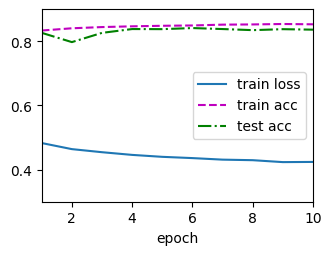

In [39]:
lr = 0.1
num_epochs = 10

def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()
def updater(batch_size):
    return sgd([W, b], lr, batch_size)

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)